# 



**Extracting Stock Data Using a Web Scraping**
Not all stock data is available via the API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.
You will extract and share historical data from a web page using the BeautifulSoup library.

# **Table of Contents**
Extracting data using BeautifulSoup

Download the web page Using Requests Library
Parse HTML on a web page using BeautifulSoup
Extract data and duild a data frame
Extracting data using pandas

Exercise

Estimated Time Needed: 30 min

In [5]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

# **Using Webscraping to Extract Stock Data Example¶**

We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.

On the following web page we have a table with columns name (Date, Open, High, Low, close, adj close volume) out of which we must extract following columns

Date

Open

High

Low

Close

Volume

# **Steps for extracting the data**

1. Send an HTTP request to the web page using the requests library.
2. Parse the HTML content of the web page using BeautifulSoup.
3. Identify the HTML tags that contain the data you want to extract.
4. Use BeautifulSoup methods to extract the data from the HTML tags.
5. Print the extracted data
- 
Step 1: Send an HTTP request to the web page
You will use the request library for sending an HTTP request to the web page.

In this example, we are using yahoo finance website and looking to extract Netflix data.


Step 1: Send an HTTP request to the web page
You will use the request library for sending an HTTP request to the web page.

In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.

In [15]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

Step 2: Parse the HTML content

# **What is parsing?**
In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning. Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.


Next you will take the raw HTML content of a web page or a string of HTML code which needs to be parsed and transformed into a structured, hierarchical format that can be more easily analyzed and manipulated in Python. This can be done using a Python library called Beautiful Soup.

# **Parsing the data using the BeautifulSoup library**
Create a new BeautifulSoup object.

**Note:** To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:


1 .The HTML or XML content that you want to parse as a string.

2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library. here in this lab we are using "html5lib" parser.

In [18]:
soup = BeautifulSoup(data, 'html.parser')

Step 3: Identify the HTML tags
As stated above, the web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.

You will create an empty data frame using the pd.DataFrame() function with the following columns:

- "Date"
- "Open"
- "High"
- "Low"
- "Close"
- "Volume"

In [20]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

Working on HTML table 

These are the following tags which are used while creating HTML tables.

- <table>: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags.

- <tr>: This tag is used to define a table row. Each row of the table is defined within this tag.

- <td>: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing tags.

- <th>: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a tag is bold and centered.

- <tbody>: This is the main content of the table, which is defined using the tag. It contains one or more rows of elements.



Step 4: Use a BeautifulSoup method for extracting data
We will use find() and find_all() methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML.

- The find() method will return particular tag content.
- The find_all() method returns a list of all matching tags in the HTML.

In [23]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
# Finally we append the data of each row to the table
netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True) 

# **Step 5: Print the extracted data**
We can now print out the data frame using the head() or tail() function.

In [25]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26


# **Extracting data using pandas library**
We can also use the pandas read_html function from the pandas library and use the URL for extracting data.

# **What is read_html in pandas library?¶**
pd.read_html(url) is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. It takes in a URL as input and returns a list of all the tables found on the web page.

In [27]:
read_html_pandas_data = pd.read_html(url)

Or you can convert the BeautifulSoup object to a string.

In [29]:

from io import StringIO  # Import StringIO to create a file-like object

# Convert the BeautifulSoup object to a string and pass it to StringIO
html_str = str(soup)
html_data = StringIO(html_str)

# Use pd.read_html() with the file-like object
read_html_pandas_data = pd.read_html(html_data)


Because there is only one table on the page, just take the first table in the returned list.

In [31]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# **Exercise: use webscraping to extract stock data**

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html. Save the text of the response as a variable named html_data.

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

In [34]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="AMZN, Amazon.com, Inc., AMZN historical prices, Amazon.com, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for AMZN stock on Yahoo Finance. View daily, weekly or monthly format back to when Amazon.com, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yaho

In [35]:
soup = BeautifulSoup(data, 'html.parser')

In [36]:
# 1. Get the title attribute content
title_content = soup.title.string  # Gets the text within the <title> tag
print(f"The content of the title attribute is: {title_content}")


The content of the title attribute is: Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


Using BeautifulSoup, extract the table with historical share prices and store it into a data frame named amazon_data. The data frame should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list col.

In [38]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    amazon_data = pd.concat([amazon_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True) 

    
    

Print out the first five rows of the amazon_data data frame you created.

In [40]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


Question 2: What are the names of the columns in the data frame?

In [42]:
# Get the column names of the DataFrame
print("Column names in the DataFrame:")
print(amazon_data.columns)


Column names in the DataFrame:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


Question 3: What is the Open of the last row of the amazon_data data frame?

In [44]:
# Get the "Open" value of the last row
last_open_value = amazon_data.iloc[-1]["Open"]
print(f"The 'Open' value of the last row is: {last_open_value}")


The 'Open' value of the last row is: 656.29


# **Amazon Stock Data Analysis**
- Data Visualization and Insights
- Line Plot of Stock Prices Over Time

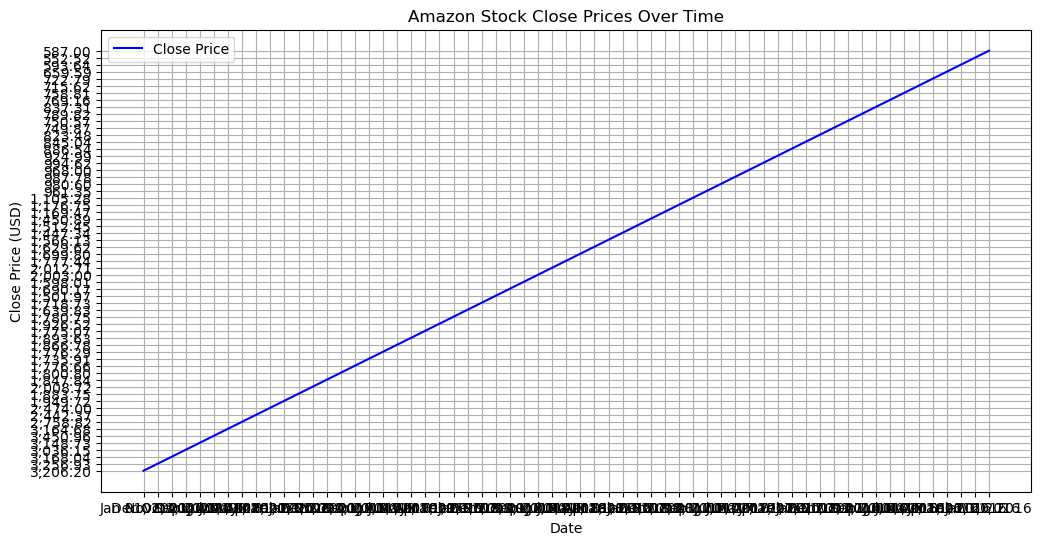

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(amazon_data["Date"], amazon_data["Close"], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Amazon Stock Close Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()


# **Trading Volume Over Time**

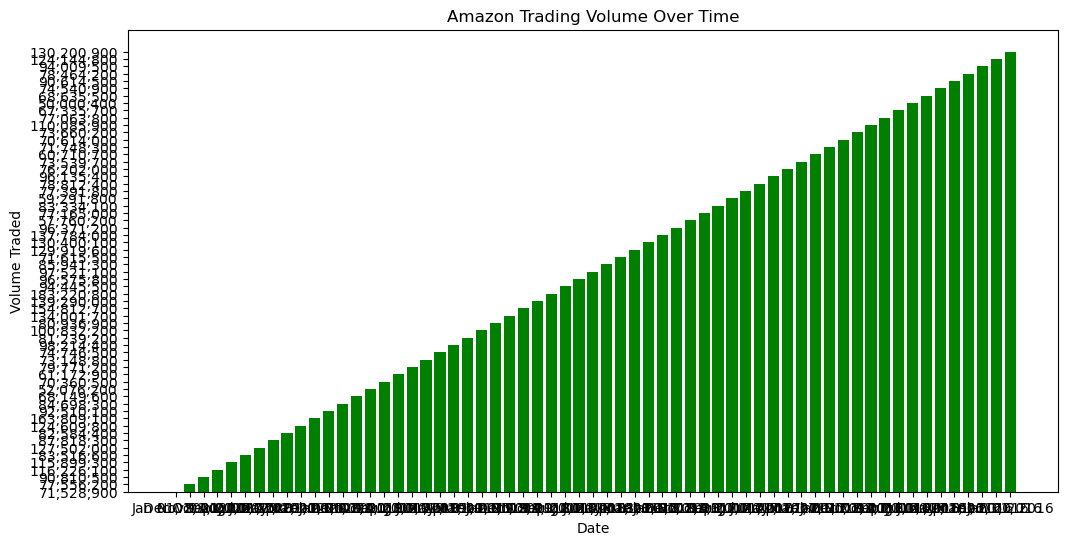

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(amazon_data["Date"], amazon_data["Volume"], color='green')
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Amazon Trading Volume Over Time")
plt.show()


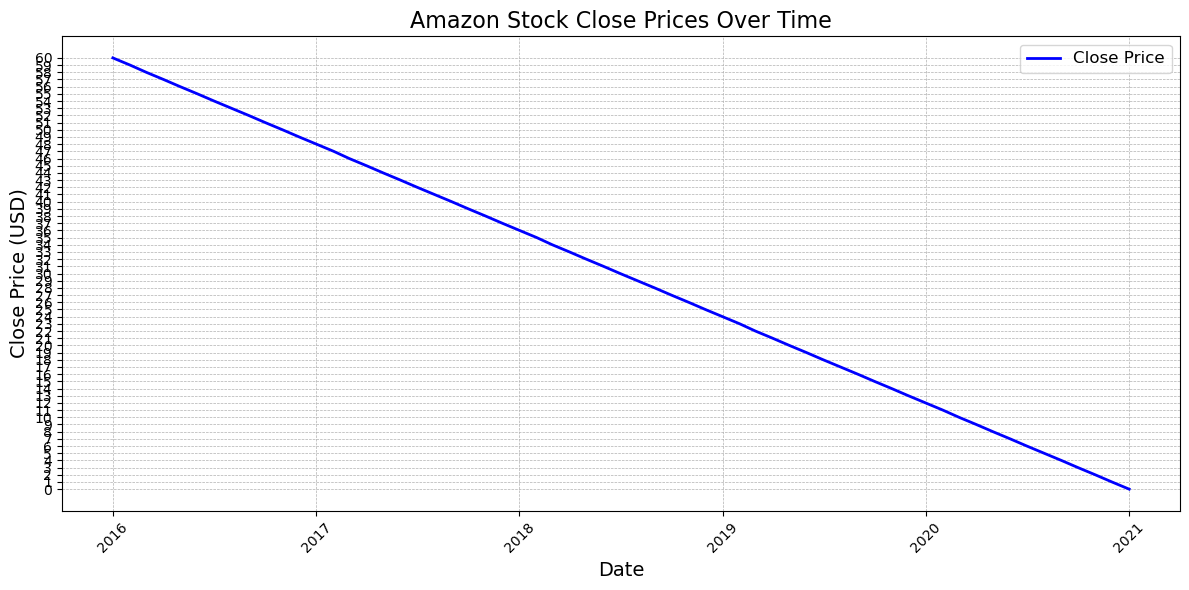

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convert the 'Date' column to datetime if not already done
amazon_data["Date"] = pd.to_datetime(amazon_data["Date"], errors='coerce')

# Create a line plot of "Close" prices
plt.figure(figsize=(12, 6))
plt.plot(amazon_data["Date"], amazon_data["Close"], label='Close Price', color='blue', linewidth=2)

# Format the X-axis to show fewer, formatted dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show dates by year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'
plt.xticks(fontsize=10, rotation=45)

# Y-axis formatting to remove overlapping
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Labels and title with increased font size
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.title("Amazon Stock Close Prices Over Time", fontsize=16)

# Add grid and legend
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Prevent label cut-off
plt.tight_layout()

# Show the plot
plt.show()
